In [2]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np
import math 

In [3]:
df = pd.read_csv('processed_data/00-train.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73995 entries, 0 to 73994
Data columns (total 94 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   user_id                         73995 non-null  uint64 
 1   org_id                          73995 non-null  object 
 2   rating                          73995 non-null  float64
 3   ts                              73995 non-null  int64  
 4   user_city                       73995 non-null  object 
 5   org_city                        73995 non-null  object 
 6   average_bill                    73995 non-null  float64
 7   rating_org                      73995 non-null  float64
 8   rubrics                         73995 non-null  object 
 9   food_delivery                   73995 non-null  int64  
 10  breakfast                       73995 non-null  int64  
 11  takeaway                        73995 non-null  int64  
 12  summer_terrace                  

In [4]:
df.describe()

,user_id,rating,ts,average_bill,rating_org,food_delivery,breakfast,takeaway,summer_terrace,wi_fi,...,is_restraunt,is_caffe,is_other,resist_covid,for_adult,rating_1,rating_2,rating_3,rating_4,rating_5
count,7.399500e+04,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,...,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000
mean,9.196627e+18,4.322779,714.540766,1079.241382,4.319332,0.757119,0.576607,0.649206,0.602554,0.860518,...,0.357457,0.256071,0.386472,0.784323,0.205676,0.058504,0.031245,0.084803,0.179864,0.645584
std,5.312861e+18,1.130370,293.492213,2230.827254,0.308584,0.428827,0.494100,0.477222,0.489373,0.346452,...,0.479254,0.436465,0.486944,0.411294,0.404198,0.234696,0.173981,0.278590,0.384076,0.478339
min,1.445171e+14,1.000000,0.000000,500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.614445e+18,4.000000,505.000000,500.000000,4.180952,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.191287e+18,5.000000,699.000000,1000.000000,4.368304,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.376070e+19,5.000000,958.000000,1166.666667,4.524001,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.844666e+19,5.000000,1216.000000,246500.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# ml

In [5]:
# df.columns
columns = [
  # 'user_id', 'org_id', 
  'rating', 
  # 'ts', 
  # 'user_city', 'org_city',
  'average_bill', 
  'rating_org', # target
  # 'rubrics', 
  'food_delivery', 
  'breakfast',
  'takeaway', 
  'summer_terrace', 
  'wi_fi', 
  'business_lunch',
  'payment_by_credit_card', 
  'coffee_to_go', 
  'closed_for_quarantine',
  'online_takeaway', 
  'karaoke', 
  'special_menu', 
  'sports_broadcasts',
  'food_court1', 
  'craft_beer', 
  'projector', 
  'gift_certificate',
  'wheelchair_access', 
  'automatic_door', 
  'food_product_delivery',
  'car_park', 
  'parking_disabled', 
  'toilet_for_disabled', 
  'promotions',
  'cafe', 
  'minimum_order', 
  'free_delivery', 
  'self_service_kiosks',
  'has_restaurant', 
  'air_conditioning', 
  'pets', 
  'elevator', 
  'has_bar',
  'internet access', 
  'privilege_tickets', 
  'organic_food', 
  'vip_zone',
  'hall_capacity', 
  'face_control', 
  'show_program', 
  'music', 
  'chillout',
  'dancefloor', 
  'dress_code', 
  'billiards', 
  'strip',
  'elevator_wheelchair_accessible', 
  'ramp', 
  'around_the_clock_work1',
  'pickup', 
  'farm_products', 
  'delivery', 
  'coffee_shop', 
  'call_button',
  'wheelchair_accessible', 
  'table_games', 
  'vinotheque',
  'cakes_for_different_occasions',
  'accepted_credit_cards', 
  'kalyan',
  'teahouse', 
  'bread_from_tandoor',
  'handmade_goods', 
  'year2018',
  'year2019', 
  'year2020', 
  'year2021', 
  'bill500', 
  'bill1000',
  'bill2000',
  'billExpensive', 
  'native_citizen', 
  'tourist', 
  'is_restraunt',
  'is_caffe', 
  'is_other'
  ]

df1 = df[columns]

KeyError: "['year2018', 'year2019', 'year2020', 'year2021'] not in index"

In [ ]:
# df1 = pd.get_dummies(df1)
print(df1.shape)
df1.head(5)

(73995, 79)


,rating,average_bill,rating_org,food_delivery,breakfast,takeaway,summer_terrace,wi_fi,business_lunch,payment_by_credit_card,...,year2021,bill500,bill1000,bill2000,billExpensive,native_citizen,tourist,is_restraunt,is_caffe,is_other
0,4.0,1500.0,3.883212,1,1,1,0,1,1,0,...,0,0,0,1,0,1,0,1,0,0
1,5.0,1000.0,4.495379,1,0,1,1,1,1,1,...,0,0,1,0,0,1,0,1,0,0
2,4.0,500.0,4.576063,1,1,1,1,1,1,1,...,0,1,0,0,0,1,0,0,1,0
3,3.0,1000.0,3.775701,1,1,1,1,1,1,1,...,0,0,1,0,0,1,0,0,1,0
4,5.0,500.0,4.187500,1,1,1,1,1,1,1,...,0,1,0,0,0,1,0,0,0,1


In [ ]:
train, test = train_test_split(df1, test_size=0.5)
target_column = 'rating_org'

train_x, train_y = train.drop(target_column, axis=1), train[target_column]
test_x, test_y = test.drop(target_column, axis=1), test[target_column]

model = KNeighborsRegressor(n_neighbors=9, weights='distance')
model.fit(train_x, train_y)

predict = model.predict(test_x)
print('MAPE:', mean_absolute_percentage_error(test_y, predict))

MAPE: 0.03612898217773416


In [ ]:
# df.columns
columns = [
  # 'user_id', 'org_id', 
  'rating', 
  # 'ts', 
  # 'user_city', 'org_city',
  'average_bill', 
  'rating_org', # target
  # 'rubrics', 
  'food_delivery', 
  'breakfast',
  'takeaway', 
  'summer_terrace', 
  'wi_fi', 
  'business_lunch',
  'payment_by_credit_card', 
  'coffee_to_go', 
  'closed_for_quarantine',
  'online_takeaway', 
  'karaoke', 
  'special_menu', 
  'sports_broadcasts',
  'food_court1', 
  'craft_beer', 
  'projector', 
  'gift_certificate',
  'wheelchair_access', 
  'automatic_door', 
  'food_product_delivery',
  'car_park', 
  'parking_disabled', 
  'toilet_for_disabled', 
  'promotions',
  'cafe', 
  'minimum_order', 
  'free_delivery', 
  'self_service_kiosks',
  'has_restaurant', 
  'air_conditioning', 
  'pets', 
  'elevator', 
  'has_bar',
  'internet access', 
  'privilege_tickets', 
  'organic_food', 
  'vip_zone',
  'hall_capacity', 
  'face_control', 
  'show_program', 
  'music', 
  'chillout',
  'dancefloor', 
  'dress_code', 
  'billiards', 
  'strip',
  'elevator_wheelchair_accessible', 
  'ramp', 
  'around_the_clock_work1',
  'pickup', 
  'farm_products', 
  'delivery', 
  'coffee_shop', 
  'call_button',
  'wheelchair_accessible', 
  'table_games', 
  'vinotheque',
  'cakes_for_different_occasions',
  'accepted_credit_cards', 
  'kalyan',
  'teahouse', 
  'bread_from_tandoor',
  'handmade_goods', 
  'year2018',
  'year2019', 
  'year2020', 
  'year2021', 
  'bill500', 
  'bill1000',
  'bill2000',
  'billExpensive', 
  'native_citizen', 
  'tourist', 
  'is_restraunt',
  'is_caffe', 
  'is_other'
  ]

df1 = df[columns]

In [ ]:
train, test = train_test_split(df1, test_size=0.5)
target_column = 'rating_org'

train_x, train_y = train.drop(target_column, axis=1), train[target_column]
test_x, test_y = test.drop(target_column, axis=1), test[target_column]

model = KNeighborsRegressor(n_neighbors=79, weights='distance')
model.fit(train_x, train_y)

predict = model.predict(test_x)
print('MAPE:', mean_absolute_percentage_error(test_y, predict))

MAPE: 0.03682440225537484


In [ ]:
df.shape

(73995, 86)

In [ ]:
# df.columns
columns = [
  # 'user_id', 'org_id', 
  'rating', 
  # 'ts', 
  # 'user_city', 'org_city',
  # 'average_bill', 
  'rating_org', # target
  # 'rubrics', 
  'food_delivery', 
  'breakfast',
  'takeaway', 
  'summer_terrace', 
  'wi_fi', 
  'business_lunch',
  'payment_by_credit_card', 
  'coffee_to_go', 
  'closed_for_quarantine',
  'online_takeaway', 
  'karaoke', 
  'special_menu', 
  'sports_broadcasts',
  'food_court1', 
  'craft_beer', 
  'projector', 
  'gift_certificate',
  'wheelchair_access', 
  'automatic_door', 
  'food_product_delivery',
  'car_park', 
  'parking_disabled', 
  'toilet_for_disabled', 
  'promotions',
  'cafe', 
  'minimum_order', 
  'free_delivery', 
  'self_service_kiosks',
  'has_restaurant', 
  'air_conditioning', 
  'pets', 
  'elevator', 
  'has_bar',
  'internet access', 
  'privilege_tickets', 
  'organic_food', 
  'vip_zone',
  'hall_capacity', 
  'face_control', 
  'show_program', 
  'music', 
  'chillout',
  'dancefloor', 
  'dress_code', 
  'billiards', 
  'strip',
  'elevator_wheelchair_accessible', 
  'ramp', 
  'around_the_clock_work1',
  'pickup', 
  'farm_products', 
  'delivery', 
  'coffee_shop', 
  'call_button',
  'wheelchair_accessible', 
  'table_games', 
  'vinotheque',
  'cakes_for_different_occasions',
  'accepted_credit_cards', 
  'kalyan',
  'teahouse', 
  'bread_from_tandoor',
  'handmade_goods', 
  'year2018',
  'year2019', 
  'year2020', 
  'year2021', 
  'bill500', 
  'bill1000',
  'bill2000',
  'billExpensive', 
  'native_citizen', 
  'tourist', 
  'is_restraunt',
  'is_caffe', 
  'is_other'
  ]

df1 = df[columns]

In [ ]:
train, test = train_test_split(df1, test_size=0.5)
target_column = 'rating_org'

train_x, train_y = train.drop(target_column, axis=1), train[target_column]
test_x, test_y = test.drop(target_column, axis=1), test[target_column]

model = KNeighborsRegressor(n_neighbors=20, weights='distance')
model.fit(train_x, train_y)

predict = model.predict(test_x)
print('MAPE:', mean_absolute_percentage_error(test_y, predict))

MAPE: 0.03609477278573819


In [ ]:
# df.columns
columns = [
  # 'user_id', 'org_id', 
  'rating', 
  # 'ts', 
  # 'user_city', 'org_city',
  # 'average_bill', 
  'rating_org', # target
  'rubrics', 
  'food_delivery', 
  'breakfast',
  'takeaway', 
  'summer_terrace', 
  'wi_fi', 
  'business_lunch',
  'payment_by_credit_card', 
  'coffee_to_go', 
  'closed_for_quarantine',
  'online_takeaway', 
  'karaoke', 
  'special_menu', 
  'sports_broadcasts',
  'food_court1', 
  'craft_beer', 
  'projector', 
  'gift_certificate',
  'wheelchair_access', 
  'automatic_door', 
  'food_product_delivery',
  'car_park', 
  'parking_disabled', 
  'toilet_for_disabled', 
  'promotions',
  'cafe', 
  'minimum_order', 
  'free_delivery', 
  'self_service_kiosks',
  'has_restaurant', 
  'air_conditioning', 
  'pets', 
  'elevator', 
  'has_bar',
  'internet access', 
  'privilege_tickets', 
  'organic_food', 
  'vip_zone',
  'hall_capacity', 
  'face_control', 
  'show_program', 
  'music', 
  'chillout',
  'dancefloor', 
  'dress_code', 
  'billiards', 
  'strip',
  'elevator_wheelchair_accessible', 
  'ramp', 
  'around_the_clock_work1',
  'pickup', 
  'farm_products', 
  'delivery', 
  'coffee_shop', 
  'call_button',
  'wheelchair_accessible', 
  'table_games', 
  'vinotheque',
  'cakes_for_different_occasions',
  'accepted_credit_cards', 
  'kalyan',
  'teahouse', 
  'bread_from_tandoor',
  'handmade_goods', 
  'year2018',
  'year2019', 
  'year2020', 
  'year2021', 
  'bill500', 
  'bill1000',
  'bill2000',
  'billExpensive', 
  'native_citizen', 
  'tourist', 
  # 'is_restraunt',
  # 'is_caffe', 
  # 'is_other'
  ]

df1 = df[columns]
df1 = pd.get_dummies(df1)

In [ ]:
train, test = train_test_split(df1, test_size=0.5)
target_column = 'rating_org'

train_x, train_y = train.drop(target_column, axis=1), train[target_column]
test_x, test_y = test.drop(target_column, axis=1), test[target_column]

model = KNeighborsRegressor(n_neighbors=300, weights='distance')
model.fit(train_x, train_y)

predict = model.predict(test_x)
print('MAPE:', mean_absolute_percentage_error(test_y, predict))

MAPE: 0.03622627447016789


In [ ]:
# df.columns
columns = [
  # 'user_id', 'org_id', 
  'rating', 
  # 'ts', 
  # 'user_city', 'org_city',
  # 'average_bill', 
  'rating_org', # target
  # 'rubrics', 
  # 'food_delivery', 
  'breakfast',
  # 'takeaway', 
  'summer_terrace', 
  'wi_fi', 
  'business_lunch',
  'payment_by_credit_card', 
  'coffee_to_go', 
  # 'closed_for_quarantine',
  # 'online_takeaway', 
  'karaoke', 
  'special_menu', 
  'sports_broadcasts',
  'food_court1', 
  'craft_beer', 
  'projector', 
  'gift_certificate',
  'wheelchair_access', 
  'automatic_door', 
  'food_product_delivery',
  'car_park', 
  'parking_disabled', 
  'toilet_for_disabled', 
  'promotions',
  'cafe', 
  'minimum_order', 
  'free_delivery', 
  'self_service_kiosks',
  'has_restaurant', 
  'air_conditioning', 
  'pets', 
  'elevator', 
  'has_bar',
  'internet access', 
  'privilege_tickets', 
  'organic_food', 
  'vip_zone',
  'hall_capacity', 
  'face_control', 
  'show_program', 
  'music', 
  'chillout',
  'dancefloor', 
  'dress_code', 
  'billiards', 
  'strip',
  'elevator_wheelchair_accessible', 
  'ramp', 
  'around_the_clock_work1',
  'pickup', 
  'farm_products', 
  'delivery', 
  'coffee_shop', 
  'call_button',
  'wheelchair_accessible', 
  'table_games', 
  'vinotheque',
  'cakes_for_different_occasions',
  'accepted_credit_cards', 
  'kalyan',
  'teahouse', 
  'bread_from_tandoor',
  'handmade_goods', 
  'year2018',
  'year2019', 
  'year2020', 
  'year2021', 
  'bill500', 
  'bill1000',
  'bill2000',
  'billExpensive', 
  'native_citizen', 
  'tourist', 
  'is_restraunt',
  'is_caffe', 
  'is_other',
  'resist_covid'
  ]

df1 = df[columns]

In [ ]:
train, test = train_test_split(df1, test_size=0.5)
target_column = 'rating_org'

train_x, train_y = train.drop(target_column, axis=1), train[target_column]
test_x, test_y = test.drop(target_column, axis=1), test[target_column]

model = KNeighborsRegressor(n_neighbors=300, weights='distance')
model.fit(train_x, train_y)

predict = model.predict(test_x)
print('MAPE:', mean_absolute_percentage_error(test_y, predict))

MAPE: 0.040960930229512964


In [ ]:
df = pd.read_csv('processed_data/00-train.csv')

In [ ]:
# df.columns
columns = [
  # 'user_id', 'org_id', 
  'rating', 
  # 'ts', 
  # 'user_city', 'org_city',
  # 'average_bill', 
  'rating_org', # target
  # 'rubrics', 
  # 'food_delivery', 
  'breakfast',
  # 'takeaway', 
  'summer_terrace', 
  'wi_fi', 
  'business_lunch',
  'payment_by_credit_card', 
  'coffee_to_go', 
  # 'closed_for_quarantine',
  # 'online_takeaway', 
  'karaoke', 
  'special_menu', 
  'sports_broadcasts',
  'food_court1', 
  'craft_beer', 
  'projector', 
  'gift_certificate',
  'wheelchair_access', 
  'automatic_door', 
  'food_product_delivery',
  'car_park', 
  'parking_disabled', 
  'toilet_for_disabled', 
  'promotions',
  'cafe', 
  'minimum_order', 
  'free_delivery', 
  'self_service_kiosks',
  'has_restaurant', 
  'air_conditioning', 
  'pets', 
  'elevator', 
  'has_bar',
  'internet access', 
  'privilege_tickets', 
  'organic_food', 
  'vip_zone',
  'hall_capacity', 
  'face_control', 
  'show_program', 
  'music', 
  'chillout',
  'dancefloor', 
  'dress_code', 
  'billiards', 
  'strip',
  'elevator_wheelchair_accessible', 
  'ramp', 
  'around_the_clock_work1',
  'pickup', 
  'farm_products', 
  'delivery', 
  'coffee_shop', 
  'call_button',
  'wheelchair_accessible', 
  'table_games', 
  'vinotheque',
  'cakes_for_different_occasions',
  'accepted_credit_cards', 
  'kalyan', 
  'teahouse', 
  'bread_from_tandoor',
  'handmade_goods', 
  'year2018',
  'year2019', 
  'year2020', 
  'year2021', 
  'bill500', 
  'bill1000',
  'bill2000',
  'billExpensive', 
  'native_citizen', 
  'tourist', 
  'is_restraunt',
  'is_caffe', 
  'is_other',
  'resist_covid'
]

df1 = df[columns]

In [ ]:
train, test = train_test_split(df1, test_size=0.5)
target_column = 'rating_org'

train_x, train_y = train.drop(target_column, axis=1), train[target_column]
test_x, test_y = test.drop(target_column, axis=1), test[target_column]

model = KNeighborsRegressor(n_neighbors=300, weights='distance')
model.fit(train_x, train_y)

predict = model.predict(test_x)
print('MAPE:', mean_absolute_percentage_error(test_y, predict))

MAPE: 0.03984112353584492


In [ ]:
df = pd.read_csv('processed_data/00-train.csv')

In [ ]:
# df.columns
columns = [
  # 'user_id', 'org_id', 
  'rating', 
  # 'ts', 
  # 'user_city', 'org_city',
  # 'average_bill', 
  'rating_org', # target
  # 'rubrics', 
  # 'food_delivery', 
  'breakfast',
  # 'takeaway', 
  'summer_terrace', 
  'wi_fi', 
  'business_lunch',
  'payment_by_credit_card', 
  'coffee_to_go', 
  # 'closed_for_quarantine',
  # 'online_takeaway', 
  'karaoke', 
  'special_menu', 
  'sports_broadcasts',
  'food_court1', 
  # 'craft_beer', 
  'projector', 
  'gift_certificate',
  'wheelchair_access', 
  'automatic_door', 
  'food_product_delivery',
  'car_park', 
  'parking_disabled', 
  'toilet_for_disabled', 
  'promotions',
  'cafe', 
  'minimum_order', 
  'free_delivery', 
  'self_service_kiosks',
  'has_restaurant', 
  'air_conditioning', 
  'pets', 
  'elevator', 
  # 'has_bar', 
  'internet access', 
  'privilege_tickets', 
  'organic_food', 
  'vip_zone',
  'hall_capacity', 
  # 'face_control',  
  'show_program', 
  'music',
  'chillout',
  'dancefloor', 
  'dress_code', 
  'billiards', 
  # 'strip', 
  'elevator_wheelchair_accessible', 
  'ramp', 
  'around_the_clock_work1',
  'pickup', 
  'farm_products', 
  'delivery', 
  'coffee_shop', 
  'call_button',
  'wheelchair_accessible', 
  'table_games', 
  # 'vinotheque', 
  'cakes_for_different_occasions',
  'accepted_credit_cards', 
  # 'kalyan', 
  'teahouse',
  'bread_from_tandoor',
  'handmade_goods', 
  'year2018',
  'year2019', 
  'year2020', 
  'year2021', 
  'bill500', 
  'bill1000',
  'bill2000',
  'billExpensive', 
  'native_citizen', 
  'tourist', 
  'is_restraunt',
  'is_caffe', 
  'is_other',
  'resist_covid',
  'for_adult'
]

df1 = df[columns]

In [ ]:
train, test = train_test_split(df1, test_size=0.5)
target_column = 'rating_org'

train_x, train_y = train.drop(target_column, axis=1), train[target_column]
test_x, test_y = test.drop(target_column, axis=1), test[target_column]

model = KNeighborsRegressor(n_neighbors=300, weights='distance')
model.fit(train_x, train_y)

predict = model.predict(test_x)
print('MAPE:', mean_absolute_percentage_error(test_y, predict))

MAPE: 0.0397062162254525


In [ ]:
df = pd.read_csv('processed_data/00-train.csv')

In [ ]:
# df.columns
columns = [
  # 'user_id', 'org_id', 
  'rating', 
  # 'ts', 
  'user_city', 
  'org_city',
  # 'average_bill', 
  'rating_org', # target
  # 'rubrics', 
  'food_delivery', 
  'breakfast',
  'takeaway', 
  'summer_terrace', 
  'wi_fi', 
  'business_lunch',
  'payment_by_credit_card', 
  'coffee_to_go', 
  'closed_for_quarantine',
  'online_takeaway', 
  'karaoke', 
  'special_menu', 
  'sports_broadcasts',
  'food_court1', 
  'craft_beer', 
  'projector', 
  'gift_certificate',
  'wheelchair_access', 
  'automatic_door', 
  'food_product_delivery',
  'car_park', 
  'parking_disabled', 
  'toilet_for_disabled', 
  'promotions',
  'cafe', 
  'minimum_order', 
  'free_delivery', 
  'self_service_kiosks',
  'has_restaurant', 
  'air_conditioning', 
  'pets', 
  'elevator', 
  'has_bar', 
  'internet access', 
  'privilege_tickets', 
  'organic_food', 
  'vip_zone',
  'hall_capacity', 
  'face_control',  
  'show_program', 
  'music',
  'chillout',
  'dancefloor', 
  'dress_code', 
  'billiards', 
  'strip', 
  'elevator_wheelchair_accessible', 
  'ramp', 
  'around_the_clock_work1',
  'pickup', 
  'farm_products', 
  'delivery', 
  'coffee_shop', 
  'call_button',
  'wheelchair_accessible', 
  'table_games', 
  'vinotheque', 
  'cakes_for_different_occasions',
  'accepted_credit_cards', 
  'kalyan', 
  'teahouse',
  'bread_from_tandoor',
  'handmade_goods', 
  'year2018',
  'year2019', 
  'year2020', 
  'year2021', 
  'bill500', 
  'bill1000',
  'bill1500',
  'bill2000',
  'bill2500',
  'bill3000',
  'bill3500',
  'bill4000',
  'billExpensive', 
  # 'native_citizen', 
  # 'tourist', 
  'is_restraunt',
  'is_caffe', 
  'is_other',
  # 'resist_covid',
  # 'for_adult'
]

df1 = df[columns]

In [ ]:
train, test = train_test_split(df1, test_size=0.5)
target_column = 'rating_org'

train_x, train_y = train.drop(target_column, axis=1), train[target_column]
test_x, test_y = test.drop(target_column, axis=1), test[target_column]

model = KNeighborsRegressor(n_neighbors=9, weights='distance')
model.fit(train_x, train_y)

predict = model.predict(test_x)
print('MAPE:', mean_absolute_percentage_error(test_y, predict))

MAPE: 0.03543504462718927


In [ ]:
df = pd.read_csv('processed_data/00-train.csv')

In [ ]:
# df.columns
columns = [
  # 'user_id', 'org_id', 
  # 'rating', 
  # 'ts', 
  'user_city', 
  'org_city',
  # 'average_bill', 
  'rating_org', # target
  # 'rubrics', 
  'food_delivery', 
  'breakfast',
  'takeaway', 
  'summer_terrace', 
  'wi_fi', 
  'business_lunch',
  'payment_by_credit_card', 
  'coffee_to_go', 
  'closed_for_quarantine',
  'online_takeaway', 
  'karaoke', 
  'special_menu', 
  'sports_broadcasts',
  'food_court1', 
  'craft_beer', 
  'projector', 
  'gift_certificate',
  'wheelchair_access', 
  'automatic_door', 
  'food_product_delivery',
  'car_park', 
  'parking_disabled', 
  'toilet_for_disabled', 
  'promotions',
  'cafe', 
  'minimum_order', 
  'free_delivery', 
  'self_service_kiosks',
  'has_restaurant', 
  'air_conditioning', 
  'pets', 
  'elevator', 
  'has_bar', 
  'internet access', 
  'privilege_tickets', 
  'organic_food', 
  'vip_zone',
  'hall_capacity', 
  'face_control',  
  'show_program', 
  'music',
  'chillout',
  'dancefloor', 
  'dress_code', 
  'billiards', 
  'strip', 
  'elevator_wheelchair_accessible', 
  'ramp', 
  'around_the_clock_work1',
  'pickup', 
  'farm_products', 
  'delivery', 
  'coffee_shop', 
  'call_button',
  'wheelchair_accessible', 
  'table_games', 
  'vinotheque', 
  'cakes_for_different_occasions',
  'accepted_credit_cards', 
  'kalyan', 
  'teahouse',
  'bread_from_tandoor',
  'handmade_goods', 
  'year2018',
  'year2019', 
  'year2020', 
  'year2021', 
  'bill500', 
  'bill1000',
  'bill1500',
  'bill2000',
  'bill2500',
  'bill3000',
  'bill3500',
  'bill4000',
  'billExpensive', 
  # 'native_citizen', 
  # 'tourist', 
  'is_restraunt',
  'is_caffe', 
  'is_other',
  # 'resist_covid',
  # 'for_adult',
  "rating_1",
  "rating_2",
  "rating_3",
  "rating_4",
  "rating_5",
]

df1 = df[columns]
df1 = pd.get_dummies(df1)
df1.describe()

,rating_org,food_delivery,breakfast,takeaway,summer_terrace,wi_fi,business_lunch,payment_by_credit_card,coffee_to_go,closed_for_quarantine,...,is_other,rating_1,rating_2,rating_3,rating_4,rating_5,user_city_msk,user_city_spb,org_city_msk,org_city_spb
count,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,...,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000
mean,4.319332,0.757119,0.576607,0.649206,0.602554,0.860518,0.618555,0.901764,0.663707,0.424623,...,0.386472,0.058504,0.031245,0.084803,0.179864,0.645584,0.721495,0.278505,0.692182,0.307818
std,0.308584,0.428827,0.494100,0.477222,0.489373,0.346452,0.485745,0.297636,0.472444,0.494289,...,0.486944,0.234696,0.173981,0.278590,0.384076,0.478339,0.448266,0.448266,0.461594,0.461594
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.180952,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.368304,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
75%,4.524001,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train, test = train_test_split(df1, test_size=0.5)
target_column = 'rating_org'

train_x, train_y = train.drop(target_column, axis=1), train[target_column]
test_x, test_y = test.drop(target_column, axis=1), test[target_column]

model = KNeighborsRegressor(n_neighbors=9, weights='distance')
model.fit(train_x, train_y)

predict = model.predict(test_x)
print('MAPE:', mean_absolute_percentage_error(test_y, predict))

MAPE: 0.03443435727715542


In [ ]:
df = pd.read_csv('processed_data/00-train.csv')

In [ ]:
# df.columns
columns = [
  # 'user_id', 'org_id', 
  # 'rating', 
  # 'ts', 
  'user_city', 
  'org_city',
  # 'average_bill', 
  'rating_org', # target
  # 'rubrics', 
  'food_delivery', 
  'breakfast',
  'takeaway', 
  'summer_terrace', 
  'wi_fi', 
  'business_lunch',
  'payment_by_credit_card', 
  'coffee_to_go', 
  'closed_for_quarantine',
  'online_takeaway', 
  'karaoke', 
  'special_menu', 
  'sports_broadcasts',
  'food_court1', 
  'craft_beer', 
  'projector', 
  'gift_certificate',
  'wheelchair_access', 
  'automatic_door', 
  'food_product_delivery',
  'car_park', 
  'parking_disabled', 
  'toilet_for_disabled', 
  'promotions',
  'cafe', 
  'minimum_order', 
  'free_delivery', 
  'self_service_kiosks',
  'has_restaurant', 
  'air_conditioning', 
  'pets', 
  'elevator', 
  'has_bar', 
  'internet access', 
  'privilege_tickets', 
  'organic_food', 
  'vip_zone',
  'hall_capacity', 
  'face_control',  
  'show_program', 
  'music',
  'chillout',
  'dancefloor', 
  'dress_code', 
  'billiards', 
  'strip', 
  'elevator_wheelchair_accessible', 
  'ramp', 
  'around_the_clock_work1',
  'pickup', 
  'farm_products', 
  'delivery', 
  'coffee_shop', 
  'call_button',
  'wheelchair_accessible', 
  'table_games', 
  'vinotheque', 
  'cakes_for_different_occasions',
  'accepted_credit_cards', 
  'kalyan', 
  'teahouse',
  'bread_from_tandoor',
  'handmade_goods', 

  'dateMM',
  'bill500', 
  'bill1000',
  'bill1500',
  'bill2000',
  'bill2500',
  'bill3000',
  'bill3500',
  'bill4000',
  'billExpensive', 
  # 'native_citizen', 
  # 'tourist', 
  'is_restraunt',
  'is_caffe', 
  'is_other',
  # 'resist_covid',
  # 'for_adult',
  "rating_1",
  "rating_2",
  "rating_3",
  "rating_4",
  "rating_5"
]

df1 = df[columns]
df1 = pd.get_dummies(df1)
df1.describe()

,rating_org,food_delivery,breakfast,takeaway,summer_terrace,wi_fi,business_lunch,payment_by_credit_card,coffee_to_go,closed_for_quarantine,...,dateMM_M37,dateMM_M38,dateMM_M39,dateMM_M4,dateMM_M40,dateMM_M5,dateMM_M6,dateMM_M7,dateMM_M8,dateMM_M9
count,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,...,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000
mean,4.319332,0.757119,0.576607,0.649206,0.602554,0.860518,0.618555,0.901764,0.663707,0.424623,...,0.030651,0.042516,0.051774,0.006554,0.003338,0.006892,0.010974,0.011771,0.013231,0.018312
std,0.308584,0.428827,0.494100,0.477222,0.489373,0.346452,0.485745,0.297636,0.472444,0.494289,...,0.172371,0.201765,0.221571,0.080695,0.057680,0.082734,0.104180,0.107855,0.114262,0.134078
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.180952,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.368304,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.524001,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73995 entries, 0 to 73994
Columns: 126 entries, rating_org to dateMM_M9
dtypes: float64(1), int64(80), uint8(45)
memory usage: 48.9 MB


In [ ]:
train, test = train_test_split(df1, test_size=0.5)
target_column = 'rating_org'

train_x, train_y = train.drop(target_column, axis=1), train[target_column]
test_x, test_y = test.drop(target_column, axis=1), test[target_column]

model = KNeighborsRegressor(n_neighbors=500, weights='distance')
model.fit(train_x, train_y)

predict = model.predict(test_x)
print('MAPE:', mean_absolute_percentage_error(test_y, predict))

MAPE: 0.043762257825877754


In [ ]:
df = pd.read_csv('processed_data/00-train.csv')

In [ ]:
# df.columns
columns = [
  # 'user_id',
  # 'org_id', 
  # 'rating', 
  # 'ts', 
  'user_city', 
  'org_city',
  # 'average_bill', 
  'rating_org', # target
  # 'rubrics', 
  'food_delivery', 
  'breakfast',
  'takeaway', 
  'summer_terrace', 
  'wi_fi', 
  'business_lunch',
  'payment_by_credit_card', 
  'coffee_to_go', 
  'closed_for_quarantine',
  'online_takeaway', 
  'karaoke', 
  'special_menu', 
  'sports_broadcasts',
  'food_court1', 
  'craft_beer', 
  'projector', 
  'gift_certificate',
  'wheelchair_access', 
  'automatic_door', 
  'food_product_delivery',
  'car_park', 
  'parking_disabled', 
  'toilet_for_disabled', 
  'promotions',
  'cafe', 
  'minimum_order', 
  'free_delivery', 
  'self_service_kiosks',
  'has_restaurant', 
  'air_conditioning', 
  'pets', 
  'elevator', 
  'has_bar', 
  'internet access', 
  'privilege_tickets', 
  'organic_food', 
  'vip_zone',
  'hall_capacity', 
  'face_control',  
  'show_program', 
  'music',
  'chillout',
  'dancefloor', 
  'dress_code', 
  'billiards', 
  'strip', 
  'elevator_wheelchair_accessible', 
  'ramp', 
  'around_the_clock_work1',
  'pickup', 
  'farm_products', 
  'delivery', 
  'coffee_shop', 
  'call_button',
  'wheelchair_accessible', 
  'table_games', 
  'vinotheque', 
  'cakes_for_different_occasions',
  'accepted_credit_cards', 
  'kalyan', 
  'teahouse',
  'bread_from_tandoor',
  'handmade_goods', 

  'dateMM',
  'bill500', 
  'bill1000',
  'bill1500',
  'bill2000',
  'bill2500',
  'bill3000',
  'bill3500',
  'bill4000',
  'billExpensive', 
  # 'native_citizen', 
  # 'tourist', 
  'is_restraunt',
  'is_caffe', 
  'is_other',
  # 'resist_covid',
  # 'for_adult',
  "rating_1",
  "rating_2",
  "rating_3",
  "rating_4",
  "rating_5"
]

df1 = df[columns]
df1 = pd.get_dummies(df1)
df1.describe()

,rating_org,food_delivery,breakfast,takeaway,summer_terrace,wi_fi,business_lunch,payment_by_credit_card,coffee_to_go,closed_for_quarantine,...,dateMM_M37,dateMM_M38,dateMM_M39,dateMM_M4,dateMM_M40,dateMM_M5,dateMM_M6,dateMM_M7,dateMM_M8,dateMM_M9
count,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,...,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000
mean,4.319332,0.757119,0.576607,0.649206,0.602554,0.860518,0.618555,0.901764,0.663707,0.424623,...,0.030651,0.042516,0.051774,0.006554,0.003338,0.006892,0.010974,0.011771,0.013231,0.018312
std,0.308584,0.428827,0.494100,0.477222,0.489373,0.346452,0.485745,0.297636,0.472444,0.494289,...,0.172371,0.201765,0.221571,0.080695,0.057680,0.082734,0.104180,0.107855,0.114262,0.134078
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.180952,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.368304,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.524001,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train, test = train_test_split(df1, test_size=0.5)
target_column = 'rating_org'

train_x, train_y = train.drop(target_column, axis=1), train[target_column]
test_x, test_y = test.drop(target_column, axis=1), test[target_column]

model = KNeighborsRegressor(n_neighbors=500, weights='distance')
model.fit(train_x, train_y)

predict = model.predict(test_x)
print('MAPE:', mean_absolute_percentage_error(test_y, predict))

MAPE: 0.043399314970972484


In [ ]:
df = pd.read_csv('processed_data/00-train.csv')

In [ ]:
# df.columns
columns = [
  # 'user_id',
  # 'org_id', 
  # 'rating', 
  # 'ts', 
  'user_city', 
  'org_city',
  # 'average_bill', 
  'rating_org', # target
  # 'rubrics', 
  'food_delivery', 
  'breakfast',
  'takeaway', 
  'summer_terrace', 
  'wi_fi', 
  'business_lunch',
  'payment_by_credit_card', 
  'coffee_to_go', 
  'closed_for_quarantine',
  'online_takeaway', 
  'karaoke', 
  'special_menu', 
  'sports_broadcasts',
  'food_court1', 
  'craft_beer', 
  'projector', 
  'gift_certificate',
  'wheelchair_access', 
  'automatic_door', 
  'food_product_delivery',
  'car_park', 
  'parking_disabled', 
  'toilet_for_disabled', 
  'promotions',
  'cafe', 
  'minimum_order', 
  'free_delivery', 
  'self_service_kiosks',
  'has_restaurant', 
  'air_conditioning', 
  'pets', 
  'elevator', 
  'has_bar', 
  'internet access', 
  'privilege_tickets', 
  'organic_food', 
  'vip_zone',
  'hall_capacity', 
  'face_control',  
  'show_program', 
  'music',
  'chillout',
  'dancefloor', 
  'dress_code', 
  'billiards', 
  'strip', 
  'elevator_wheelchair_accessible', 
  'ramp', 
  'around_the_clock_work1',
  'pickup', 
  'farm_products', 
  'delivery', 
  'coffee_shop', 
  'call_button',
  'wheelchair_accessible', 
  'table_games', 
  'vinotheque', 
  'cakes_for_different_occasions',
  'accepted_credit_cards', 
  'kalyan', 
  'teahouse',
  'bread_from_tandoor',
  'handmade_goods', 

  'dateMM',
  'bill500', 
  'bill1000',
  'bill1500',
  'bill2000',
  'bill2500',
  'bill3000',
  'bill3500',
  'bill4000',
  'billExpensive', 
  # 'native_citizen', 
  # 'tourist', 
  'is_restraunt',
  'is_caffe', 
  'is_other',
  # 'resist_covid',
  # 'for_adult',
  "rating_1",
  "rating_2",
  "rating_3",
  "rating_4",
  "rating_5"
]

df1 = df[columns]
df1 = pd.get_dummies(df1)
df1.describe()

,rating_org,food_delivery,breakfast,takeaway,summer_terrace,wi_fi,business_lunch,payment_by_credit_card,coffee_to_go,closed_for_quarantine,...,dateMM_M37,dateMM_M38,dateMM_M39,dateMM_M4,dateMM_M40,dateMM_M5,dateMM_M6,dateMM_M7,dateMM_M8,dateMM_M9
count,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,...,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000
mean,4.319332,0.757119,0.576607,0.649206,0.602554,0.860518,0.618555,0.901764,0.663707,0.424623,...,0.030651,0.042516,0.051774,0.006554,0.003338,0.006892,0.010974,0.011771,0.013231,0.018312
std,0.308584,0.428827,0.494100,0.477222,0.489373,0.346452,0.485745,0.297636,0.472444,0.494289,...,0.172371,0.201765,0.221571,0.080695,0.057680,0.082734,0.104180,0.107855,0.114262,0.134078
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.180952,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.368304,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.524001,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df1.columns.values

array(['rating_org', 'food_delivery', 'breakfast', 'takeaway',
       'summer_terrace', 'wi_fi', 'business_lunch',
       'payment_by_credit_card', 'coffee_to_go', 'closed_for_quarantine',
       'online_takeaway', 'karaoke', 'special_menu', 'sports_broadcasts',
       'food_court1', 'craft_beer', 'projector', 'gift_certificate',
       'wheelchair_access', 'automatic_door', 'food_product_delivery',
       'car_park', 'parking_disabled', 'toilet_for_disabled',
       'promotions', 'cafe', 'minimum_order', 'free_delivery',
       'self_service_kiosks', 'has_restaurant', 'air_conditioning',
       'pets', 'elevator', 'has_bar', 'internet access',
       'privilege_tickets', 'organic_food', 'vip_zone', 'hall_capacity',
       'face_control', 'show_program', 'music', 'chillout', 'dancefloor',
       'dress_code', 'billiards', 'strip',
       'elevator_wheelchair_accessible', 'ramp', 'around_the_clock_work1',
       'pickup', 'farm_products', 'delivery', 'coffee_shop',
       'call_button',

In [ ]:
for col in df1.columns.values:
  if col.startswith('dateMM'):
    df1[col] = df1[col] * 100
  if col in ['user_city_msk', 'user_city_spb', 'org_city_msk',
       'org_city_spb']:
    df1[col] = df1[col] * 50
  if col.startswith('bill'):
    df1[col] = df1[col] * 75

In [ ]:
w = np.asarray(([1.0] * 80) + ([2.0] * 4) + ([5.0] * 41))
def dist(a, b):
  return math.sqrt(np.sum(np.multiply(w, np.square(a - b))))

train, test = train_test_split(df1, test_size=0.5)
target_column = 'rating_org'

train_x, train_y = train.drop(target_column, axis=1), train[target_column]
test_x, test_y = test.drop(target_column, axis=1), test[target_column]

model = KNeighborsRegressor(n_neighbors=300, weights='distance')
model.fit(train_x, train_y)

predict = model.predict(test_x)
print('MAPE:', mean_absolute_percentage_error(test_y, predict))

MAPE: 0.04750707034258886


In [ ]:
df = pd.read_csv('processed_data/00-train.csv')
# df.columns
columns = [
  # 'user_id',
  # 'org_id', 
  # 'rating', 
  # 'ts', 
  'user_city', 
  'org_city',
  # 'average_bill', 
  'rating_org', # target
  # 'rubrics', 
  'food_delivery', 
  'breakfast',
  'takeaway', 
  'summer_terrace', 
  'wi_fi', 
  'business_lunch',
  'payment_by_credit_card', 
  'coffee_to_go', 
  'closed_for_quarantine',
  'online_takeaway', 
  'karaoke', 
  'special_menu', 
  'sports_broadcasts',
  'food_court1', 
  'craft_beer', 
  'projector', 
  'gift_certificate',
  'wheelchair_access', 
  'automatic_door', 
  'food_product_delivery',
  'car_park', 
  'parking_disabled', 
  'toilet_for_disabled', 
  'promotions',
  'cafe', 
  'minimum_order', 
  'free_delivery', 
  'self_service_kiosks',
  'has_restaurant', 
  'air_conditioning', 
  'pets', 
  'elevator', 
  'has_bar', 
  'internet access', 
  'privilege_tickets', 
  'organic_food', 
  'vip_zone',
  'hall_capacity', 
  'face_control',  
  'show_program', 
  'music',
  'chillout',
  'dancefloor', 
  'dress_code', 
  'billiards', 
  'strip', 
  'elevator_wheelchair_accessible', 
  'ramp', 
  'around_the_clock_work1',
  'pickup', 
  'farm_products', 
  'delivery', 
  'coffee_shop', 
  'call_button',
  'wheelchair_accessible', 
  'table_games', 
  'vinotheque', 
  'cakes_for_different_occasions',
  'accepted_credit_cards', 
  'kalyan', 
  'teahouse',
  'bread_from_tandoor',
  'handmade_goods', 

  'dateMM',
  'bill500', 
  'bill1000',
  'bill1500',
  'bill2000',
  'bill2500',
  'bill3000',
  'bill3500',
  'bill4000',
  'billExpensive', 
  # 'native_citizen', 
  # 'tourist', 
  'is_restraunt',
  'is_caffe', 
  'is_other',
  # 'resist_covid',
  # 'for_adult',
  "rating_1",
  "rating_2",
  "rating_3",
  "rating_4",
  "rating_5"
]

df1 = df[columns]
df1 = pd.get_dummies(df1)
df1.describe()

for col in df1.columns.values:
  if col.startswith('dateMM'):
    df1[col] = df1[col] * 10000
  if col in ['user_city_msk', 'user_city_spb', 'org_city_msk',
       'org_city_spb']:
    df1[col] = df1[col] * 500
  if col.startswith('bill'):
    df1[col] = df1[col] * 750

w = np.asarray(([1.0] * 80) + ([2.0] * 4) + ([5.0] * 41))
def dist(a, b):
  return math.sqrt(np.sum(np.multiply(w, np.square(a - b))))

train, test = train_test_split(df1, test_size=0.5)
target_column = 'rating_org'

train_x, train_y = train.drop(target_column, axis=1), train[target_column]
test_x, test_y = test.drop(target_column, axis=1), test[target_column]

model = KNeighborsRegressor(n_neighbors=10, weights='distance')
model.fit(train_x, train_y)

predict = model.predict(test_x)
print('MAPE:', mean_absolute_percentage_error(test_y, predict))

MAPE: 0.046135060264484246


In [ ]:
df = pd.read_csv('processed_data/00-train.csv')
# df.columns
columns = [
  # 'user_id',
  # 'org_id', 
  # 'rating', 
  # 'ts', 
  'user_city', 
  'org_city',
  # 'average_bill', 
  'rating_org', # target
  # 'rubrics', 
  'food_delivery', 
  'breakfast',
  'takeaway', 
  'summer_terrace', 
  'wi_fi', 
  'business_lunch',
  'payment_by_credit_card', 
  'coffee_to_go', 
  'closed_for_quarantine',
  'online_takeaway', 
  'karaoke', 
  'special_menu', 
  'sports_broadcasts',
  'food_court1', 
  'craft_beer', 
  'projector', 
  'gift_certificate',
  'wheelchair_access', 
  'automatic_door', 
  'food_product_delivery',
  'car_park', 
  'parking_disabled', 
  'toilet_for_disabled', 
  'promotions',
  'cafe', 
  'minimum_order', 
  'free_delivery', 
  'self_service_kiosks',
  'has_restaurant', 
  'air_conditioning', 
  'pets', 
  'elevator', 
  'has_bar', 
  'internet access', 
  'privilege_tickets', 
  'organic_food', 
  'vip_zone',
  'hall_capacity', 
  'face_control',  
  'show_program', 
  'music',
  'chillout',
  'dancefloor', 
  'dress_code', 
  'billiards', 
  'strip', 
  'elevator_wheelchair_accessible', 
  'ramp', 
  'around_the_clock_work1',
  'pickup', 
  'farm_products', 
  'delivery', 
  'coffee_shop', 
  'call_button',
  'wheelchair_accessible', 
  'table_games', 
  'vinotheque', 
  'cakes_for_different_occasions',
  'accepted_credit_cards', 
  'kalyan', 
  'teahouse',
  'bread_from_tandoor',
  'handmade_goods', 

  'dateMM',
  'bill500', 
  'bill1000',
  'bill1500',
  'bill2000',
  'bill2500',
  'bill3000',
  'bill3500',
  'bill4000',
  'billExpensive', 
  # 'native_citizen', 
  # 'tourist', 
  'is_restraunt',
  'is_caffe', 
  'is_other',
  # 'resist_covid',
  # 'for_adult',
  "rating_1",
  "rating_2",
  "rating_3",
  "rating_4",
  "rating_5"
]

df1 = df[columns]
df1 = pd.get_dummies(df1)
df1.describe()

for a in range(1, 1000, 100):
  for b in range(1, 1000, 100):
    for c in range(1, 1000, 100):
      df2 = df1

      for col in df1.columns.values:
        if col.startswith('dateMM'):
          df1[col] = df1[col] * c
        if col in ['user_city_msk', 'user_city_spb', 'org_city_msk',
            'org_city_spb']:
          df1[col] = df1[col] * b
        if col.startswith('bill'):
          df1[col] = df1[col] * a

      train, test = train_test_split(df1, test_size=0.5)
      target_column = 'rating_org'

      train_x, train_y = train.drop(target_column, axis=1), train[target_column]
      test_x, test_y = test.drop(target_column, axis=1), test[target_column]
      model = KNeighborsRegressor(n_neighbors=10, weights='distance')
      model.fit(train_x, train_y)

      predict = model.predict(test_x)
      print(c, b, a, ', MAPE:', mean_absolute_percentage_error(test_y, predict))

      df1 = df2

1 1 1 , MAPE: 0.03740566848044926
101 1 1 , MAPE: 0.04528778564443958
201 1 1 , MAPE: 0.04604334889123585
301 1 1 , MAPE: 0.0457506497516325
401 1 1 , MAPE: 0.045796412351437096
501 1 1 , MAPE: 0.04523076679455485
601 1 1 , MAPE: 0.04559907045350562
701 1 1 , MAPE: 0.04530717968845438
801 1 1 , MAPE: 0.04490493173157235
901 1 1 , MAPE: 0.04537054690107151
1 101 1 , MAPE: 0.04603636867196618
101 101 1 , MAPE: 0.04513356259276001
201 101 1 , MAPE: 0.046063957652371236
301 101 1 , MAPE: 0.045568852562591876
401 101 1 , MAPE: 0.045404078226574676
501 101 1 , MAPE: 0.045356473190104746
601 101 1 , MAPE: 0.04592853340787288
701 101 1 , MAPE: 0.045817544481741315
801 101 1 , MAPE: 0.04588929664314844
901 101 1 , MAPE: 0.045786122539895266
1 201 1 , MAPE: 0.045459122853942886
101 201 1 , MAPE: 0.04569807821981676
201 201 1 , MAPE: 0.04584607900928478
301 201 1 , MAPE: 0.04554417716067481
401 201 1 , MAPE: 0.04587686984378446
501 201 1 , MAPE: 0.045842245299013616
601 201 1 , MAPE: 0.0458290384

KeyboardInterrupt: 

In [100]:
df = pd.read_csv('processed_data/00-train.csv')
# df.columns
columns = [
  # 'user_id',
  # 'org_id', 
  # 'rating', 
  # 'ts', 
  'user_city', 
  'org_city',
  # 'average_bill', 
  'rating_org', # target
  # 'rubrics', 
  'food_delivery', 
  'breakfast',
  'takeaway', 
  'summer_terrace', 
  'wi_fi', 
  'business_lunch',
  'payment_by_credit_card', 
  'coffee_to_go', 
  'closed_for_quarantine',
  'online_takeaway', 
  'karaoke', 
  'special_menu', 
  'sports_broadcasts',
  'food_court1', 
  'craft_beer', 
  'projector', 
  'gift_certificate',
  'wheelchair_access', 
  'automatic_door', 
  'food_product_delivery',
  'car_park', 
  'parking_disabled', 
  'toilet_for_disabled', 
  'promotions',
  'cafe', 
  'minimum_order', 
  'free_delivery', 
  'self_service_kiosks',
  'has_restaurant', 
  'air_conditioning', 
  'pets', 
  'elevator', 
  'has_bar', 
  'internet access', 
  'privilege_tickets', 
  'organic_food', 
  'vip_zone',
  'hall_capacity', 
  'face_control',  
  'show_program', 
  'music',
  'chillout',
  'dancefloor', 
  'dress_code', 
  'billiards', 
  'strip', 
  'elevator_wheelchair_accessible', 
  'ramp', 
  'around_the_clock_work1',
  'pickup', 
  'farm_products', 
  'delivery', 
  'coffee_shop', 
  'call_button',
  'wheelchair_accessible', 
  'table_games', 
  'vinotheque', 
  'cakes_for_different_occasions',
  'accepted_credit_cards', 
  'kalyan', 
  'teahouse',
  'bread_from_tandoor',
  'handmade_goods', 

  'dateMM',
  'bill500', 
  'bill1000',
  'bill1500',
  'bill2000',
  'bill2500',
  'bill3000',
  'bill3500',
  'bill4000',
  'billExpensive', 
  # 'native_citizen', 
  # 'tourist', 
  'is_restraunt',
  'is_caffe', 
  'is_other',
  'resist_covid',
  'for_adult',
  "rating_1",
  "rating_2",
  "rating_3",
  "rating_4",
  "rating_5"
]

df1 = df[columns]
df1 = pd.get_dummies(df1)
df1.describe()

for col in df1.columns.values:
  if col.startswith('dateMM'):
    df1[col] = df1[col] * 1000
  if col in ['user_city_msk', 'user_city_spb', 'org_city_msk',
       'org_city_spb']:
    df1[col] = df1[col] * 100
  if col.startswith('bill'):
    df1[col] = df1[col] * 200
  if col.startswith('rating_') and col != "rating_org":
    df1[col] = df1[col] * 300
  if (col.startswith('is_')):
    df1[col] = df1[col] * 200
  if col == 'resist_covid' or col == 'for_adult':
    df1[col] = df1[col] * 50

train, test = train_test_split(df1, test_size=0.5)
target_column = 'rating_org'

train_x, train_y = train.drop(target_column, axis=1), train[target_column]
test_x, test_y = test.drop(target_column, axis=1), test[target_column]

model = KNeighborsRegressor(n_neighbors=5, weights='distance')
model.fit(train_x, train_y)

predict = model.predict(test_x)
print('MAPE:', mean_absolute_percentage_error(test_y, predict))

MAPE: 0.05129839628036865


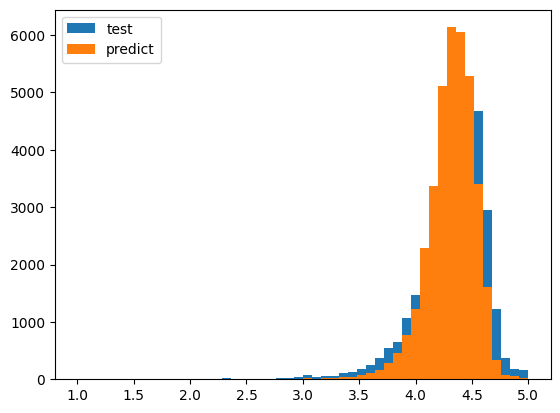

In [101]:
from matplotlib import pyplot as plt
plt.hist(test.rating_org, label="test",bins=50)
tmp = predict
plt.hist(tmp, label="predict", bins=50)
plt.legend()